In [1]:
%reload_ext autoreload
%autoreload 2

import sys,os
import numpy as np
import matplotlib.pyplot as plt
sys.path.append(os.path.join(os.getcwd(), '../'))
# from hardware.slm import SLM
from hardware.camera import NITCam
from hardware.waveshaper import Waveshaper
from hardware.yokogawa_osa import YokogawaOSA

def thz2nm(THz):
    return 299792.458/THz

%matplotlib qt

starting = False

In [2]:
osa = YokogawaOSA()#TCPIP::192.168.1.23::INSTR')
osa.connect()

ws = Waveshaper()

In [3]:
camera = NITCam()
camera.bitDepth = 14
camera.exposure_time = 2000
# camera.analog_gain = "High"
# camera.FPS = 10
camera.frame_width = 256#424#432
camera.frame_height = 256#320#424#432
camera.offset_x = 32#320#496
camera.offset_y = 0#252#212
# camera.setNUCfile(r'C:\Users\think\Desktop\NUCFactory_500us.yml')


Observer initialized


In [4]:
camera.connect()
camera.setNUCfile(r'C:\Users\think\Desktop\NUCFactory_2000us.yml')
# camera.device.setParamValueOf("Camera Mode", "LinHigh")
 

In [26]:

camera.disconnect()

In [42]:
plt.figure()
plt.imshow(camera.capture_single_frame(), cmap='gray')

In [21]:
img = camera.capture_single_frame()
plt.imshow(img, cmap='gray')

In [24]:
plt.imshow(img, cmap='gray')

In [22]:
np.save(r'Z:\Maodong\Projects\Speckle_with_Comb\Test_Collimator_20241219\image_after_PD_collimator_1mmMMF', img)

In [25]:
130*15

1950

In [23]:
# save img to json
import json
import numpy as np
import os

with open(r'Z:\Maodong\Projects\Speckle_with_Comb\Test_Collimator_20241219\image_after_PD_collimator_1mmMMF.json', 'w') as f:
    json.dump(img.tolist(), f)

In [8]:
# # the 201th min value of img
# img_flat = img.flatten()
# img_flat.sort()
# print(img_flat[201])

# # the 201th max value of img
# img_flat = img.flatten()
# img_flat.sort()
# print(img_flat[-201])

# # normalize the image 

In [9]:
osa.wavelength_center_nm

1549.9999999999998

In [10]:
# osa.write_trace('a')
# osa.write_trace('f')

# osa.wavelength_center_nm = 1550
# osa.wavelength_span_nm = 80

In [ ]:
if starting:
    osa.run_and_wait()
    osa.save_trace('f', r'Z:\Maodong\Projects\Speckle_with_Comb\CombPattern_20241219_one_EDFA_1um5mMMF\OSA\input_full_comb')

In [4]:
from experiments.speckle_collector_with_comb import SpeckleCollectorWithComb
sc = SpeckleCollectorWithComb(camera=camera, ws=ws)
sc.comb_fsr_ghz = 100

In [13]:
if starting:
    osa.fix_trace('a')
    osa.blank_trace('a')
    osa.write_trace('f')

In [6]:
sc.comb_reference_wl_nm = 1557.547
sc.comb_min_wl_nm = 1527
sc.comb_max_wl_nm = 1563

sc.comb_fsr_ghz = 100
# sc.filter_comb_with_new_fsr()

In [ ]:
if starting:
    sc.comb_fsr_ghz = 50

    sc.filter_comb_with_new_fsr()

    osa.run_and_wait()
    osa.save_trace('f', r'Z:\Maodong\Projects\Speckle_with_Comb\CombPattern_20241219_one_EDFA_1um5mMMF\OSA\input_odd_50ghz_comb_%dnm_%dnm' % (sc.comb_min_wl_nm, sc.comb_max_wl_nm))

In [ ]:
if starting:
    sc.comb_fsr_ghz = 50

    sc.filter_comb_with_new_fsr(centers=sc.comb_center_freq_thz+0.025)

    osa.run_and_wait()
    osa.save_trace('f', r'Z:\Maodong\Projects\Speckle_with_Comb\CombPattern_20241219_one_EDFA_1um5mMMF\OSA\input_even_50ghz_comb_%dnm_%dnm' % (sc.comb_min_wl_nm, sc.comb_max_wl_nm))

In [ ]:
if starting:
    sc.comb_fsr_ghz = 25
    sc.filter_comb_with_new_fsr()
    osa.run_and_wait()
    osa.save_trace('f', r'Z:\Maodong\Projects\Speckle_with_Comb\CombPattern_20241219_one_EDFA_1um5mMMF\OSA\used_full_25ghz_comb_%dnm_%dnm' % (sc.comb_min_wl_nm, sc.comb_max_wl_nm))

In [21]:
# sc.comb_fsr_ghz = 25

# sc.ws.set_bandpass(center=sc.comb_center_freq_thz[2], span=sc.bpf_bw_thz, unit='THz')

In [22]:
# ii = 17
# sc.ws.set_bandpass(center=sc.comb_center_freq_thz[ii], span=sc.bpf_bw_thz, unit='THz', passband_atten=5)
# osa.wavelength_center_nm = thz2nm(sc.comb_center_freq_thz[ii])
# osa.run_and_wait()
# osa.peak_search('f')

In [23]:
# # sc.comb_center_freq_thz[10]
# osa.wavelength_center_nm = thz2nm(sc.comb_center_freq_thz[10])
# osa.wavelength_span_nm = 3

In [24]:
# ii = 7
# sc.ws.set_bandpass(center=sc.comb_center_freq_thz[ii], span=sc.bpf_bw_thz, unit='THz', passband_atten=1)
# osa.wavelength_center_nm = thz2nm(sc.comb_center_freq_thz[ii])
# osa.run_and_wait()
# osa.peak_search('f')

# Calibrate the comb line power

In [5]:
sc.comb_fsr_ghz = 25
# sc.filter_comb_with_new_fsr()
# osa.write_trace('b')
osa.display_trace('b')
osa.run_and_wait()

osa.fix_trace('b')
osa.blank_trace('b')

osa_nm, osa_pwr = osa.get_trace('b')
osa_thz = np.array([thz2nm(nm) for nm in osa_nm])

# find the peaks of the comb
from scipy.signal import find_peaks
peaks, _ = find_peaks(osa_pwr, height=-40)
# plt.figure()
# plt.plot(osa_thz, osa_pwr)
# plt.plot(osa_thz[peaks], osa_pwr[peaks], 'x')



from scipy.interpolate import interp1d



f = interp1d(osa_thz[peaks], osa_pwr[peaks], kind='linear', fill_value='extrapolate')

def get_att_from_thz(thz, max_input = -40):
    return max(f(thz) - max_input,0)

In [6]:
f = interp1d(osa_thz[peaks], osa_pwr[peaks], kind='linear', fill_value=-np.inf, bounds_error=False)

def get_att_from_thz(thz, max_input = -40):
    return max(f(thz) - max_input,0)

plt.figure()
plt.plot(osa_thz, [get_att_from_thz(x) for x in osa_thz] )

In [27]:
plt.close('all')

In [29]:
# plt.plot(osa_thz, [get_att_from_thz(thz) for thz in osa_thz])

In [ ]:
# # calibrate 
# calibrated_power = {}
# for ii, thz in enumerate(sc.comb_center_freq_thz):
#     sc.ws.set_bandpass(center=thz, span=sc.bpf_bw_thz, unit='THz', passband_atten=0)
#     osa.wavelength_center_nm = thz2nm(thz)
#     osa.run_and_wait()
#     _, pwr = osa.peak_search('f')
#     calibrated_power[thz] = pwr

# # save the calibrated power
# import json
# with open(r'Z:\Maodong\Projects\Speckle_with_Comb\CombPattern_20241219_one_EDFA_1um5mMMF\OSA\calibrated_single_combline_power.json', 'w') as f:
#     json.dump(calibrated_power, f)

In [31]:
# import json
# with open(r'Z:\Maodong\Projects\Speckle_with_Comb\CombPattern_20241216_changeto_one_EDFA\OSA\calibrated_single_combline_power.json', 'r') as f:
#     calibrated_power = json.load(f)

# # change key from string to float
# calibrated_power = {float(k):v for k,v in calibrated_power.items()}

In [32]:
# for ii, thz in enumerate(sc.comb_center_freq_thz):
#     sc.ws.set_bandpass(center=thz, span=sc.bpf_bw_thz, unit='THz', passband_atten=max(0, 40-calibrated_power[thz]))

In [33]:
# calibrated_power[sc.comb_center_freq_thz[10]]

In [34]:
# max(0, calibrated_power[sc.comb_center_freq_thz[13]]-(-38))

# plt.plot(calibrated_power.keys(), [max(0, calibrated_power[thz]-(-38)) for thz in calibrated_power.keys()])

## First test the correlation of patterns

- take out the object to proceed

In [35]:

# def get_atten(thz):
#     pwr = calibrated_power.get(thz, 100)
#     return min(max(0, pwr-(-39)), 60)

# plt.plot(calibrated_power.keys(), [get_atten(thz) for thz in calibrated_power.keys()])

In [36]:
# img = sc.collect_thz_pattern(sc.comb_center_freq_thz[-13])
# plt.figure()
# plt.imshow(img.reshape(int(camera.frame_height), int(camera.frame_width)), cmap='gray')

In [37]:
# osa.wavelength_start_nm = sc.comb_min_wl_nm-5
# osa.wavelength_stop_nm = sc.comb_max_wl_nm+5
# osa.run()

In [38]:
# camera.disconnect()

In [39]:
# camera.connect()
# camera.setNUCfile(r'C:\Users\think\Desktop\NUCFactory_2000us.yml')

### pattern check

In [7]:
from hardware.rs_oscilloscope import RsOSC
osc = RsOSC()
osc.connect()

import time
def callback_osc():
    time.sleep(1)
    return [osc.get_avg_voltage(channel=1)]

In [41]:
# camera.connect()
# camera.setNUCfile(r'C:\Users\think\Desktop\NUCFactory_2000us.yml')

In [ ]:
# filename = r'Z:\Maodong\Projects\Speckle_with_Comb\CombPattern_20241219_one_EDFA_1um5mMMF\dataset3_pattern_only_2MMFand1500DF\pattern_%d_%d_%dGHz' % (sc.comb_min_wl_nm, sc.comb_max_wl_nm, sc.comb_fsr_ghz)

# # import time
# # def callback_readosa():
# #     osa.run_and_wait()
# #     return list(osa.get_trace('f', plot=False)[1].flatten())

# # sc.filter_comb_with_new_fsr()
# # osa.run_and_wait()
# # osa.save_trace('f', os.path.join(os.path.dirname(filename), 'input_comb'), plot=False)

# # time.sleep(2)

# # sc.scan_pattern(filename=filename, callback=callback_readosa)

# def get_atten(thz):
#     pwr = calibrated_power.get(thz, 100)
#     return min(max(0, pwr-(-38)), 60)

# plt.plot(calibrated_power.keys(), [get_atten(thz) for thz in calibrated_power.keys()])

# sc.scan_pattern(filename=filename, callback=callback_osc, get_bandpass_atten_func=get_atten)


In [43]:
# # get the index of maximum value in [get_atten(thz) for thz in calibrated_power.keys()]
# max_atten = max([get_atten(thz) for thz in calibrated_power.keys()])
# max_atten_idx = [get_atten(thz) for thz in calibrated_power.keys()].index(max_atten)
# print(max_atten_idx)

In [44]:
# sc.filter_comb_with_new_fsr()

### imaging

In [18]:
from hardware.rs_oscilloscope import RsOSC
osc = RsOSC()
osc.connect()

import time
# def callback_osc():
#     time.sleep(5)
#     # osc.update_vertical_scale_by_last_measurement(mean_scale_to=0.2)
#     return [osc.get_avg_voltage(channel=1)]

def callback_osc():
    osc.single_and_wait()
    time.sleep(0.1)
    return osc.get_trace(channel=1, plot=False)

In [46]:
# def callback_osc():
#     time.sleep(0.5)
#     mu, st = osc.get_time_avged_voltage(channel=1, time=3.5)
#     return [mu, st]

In [11]:
# let OSC single sweep
osc.single_and_wait()

tt = osc.get_trace(channel=1)

In [25]:
osc.write('SINGle')


In [28]:
osc.query('ACQ:STATE?')

'COMP'

In [27]:
osc.query('ACQ:STATE?')

'STOP'

In [47]:
# ii = -15

# def get_atten(thz):
#     pwr = calibrated_power.get(thz, 100)
#     return min(max(0, pwr-(-39)), 60)

# img = sc.collect_thz_pattern(sc.comb_center_freq_thz[ii], passband_atten=get_atten(sc.comb_center_freq_thz[ii]))
# print(sc.comb_center_freq_thz[ii], get_atten(sc.comb_center_freq_thz[ii]))
# plt.figure()
# plt.imshow(img.reshape(int(camera.frame_height), int(camera.frame_width)), cmap='gray')

In [19]:
sc.comb_fsr_ghz = 100
sc.filter_comb_with_new_fsr()

In [38]:
sc.ws.set_bandpass(center=sc.comb_center_freq_thz[8], span=sc.bpf_bw_thz, unit='THz', passband_atten=7)

(array([185.75      , 185.75100009, 185.75200018, ..., 197.09799982,
        197.09899991, 197.1       ]),
 array([60, 60, 60, ..., 60, 60, 60]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([1, 1, 1, ..., 1, 1, 1]))

In [46]:
import time
sc.comb_fsr_ghz = 100

osc.set_vertical_scale_volt(channel=1, scale=0.2/10)

for ii in range(0, len(sc.comb_center_freq_thz) ): #//4, len(sc.comb_center_freq_thz)//2):
    time.sleep(0.5)
    sc.ws.set_bandpass(center=sc.comb_center_freq_thz[ii], span=sc.bpf_bw_thz, unit='THz', passband_atten=get_att_from_thz(sc.comb_center_freq_thz[ii]))

In [ ]:
filename = r'Z:\Maodong\Projects\Speckle_with_Comb\CombPattern_20241219_one_EDFA_1um5mMMF\dataset1_increase_digitalsum_and_pdpower_corr_withoutobj_2MMFand1500DF\pattern_%d_%d_%dGHz' % (sc.comb_min_wl_nm, sc.comb_max_wl_nm, sc.comb_fsr_ghz)


In [33]:
camera.connect()
camera.setNUCfile(r'C:\Users\think\Desktop\NUCFactory_2000us.yml')

In [23]:
sc.comb_fsr_ghz = 100

sc.ws.set_bandpass(center=sc.comb_center_freq_thz[10], span=sc.bpf_bw_thz, unit='THz', passband_atten=get_att_from_thz(sc.comb_center_freq_thz[10]))

img = sc.collect_thz_pattern(sc.comb_center_freq_thz[10])
plt.figure()
plt.imshow(img.reshape(int(camera.frame_height), int(camera.frame_width)), cmap='gray')

In [21]:
plt.close('all')

In [49]:
1

1

### With Object Experiment

In [34]:
sc.comb_fsr_ghz = 25


osc.set_vertical_scale_volt(channel=1, scale=0.25/10)

filename_identify = 'withobj'

for ii in [15]:
    filename = r'Z:\Maodong\Projects\Speckle_with_Comb\CombPattern_20241219_one_EDFA_1um5mMMF_1umMMFtocollect\dataset%d_%s_1MMFand1500DF_collect_with_new_collimator\pattern_%d_%d_%dGHz' % (ii, filename_identify, sc.comb_min_wl_nm, sc.comb_max_wl_nm, sc.comb_fsr_ghz)


    # sc.filter_comb_with_new_fsr()
    # osa.run_and_wait()
    # osa.save_trace('f', os.path.join(os.path.dirname(filename), 'input_comb'), plot=False)
    import time
    time.sleep(1)

    # sc.scan_pattern(filename=filename, callback=callback_osc)
    sc.scan_pattern(filename=filename, callback=callback_osc, get_bandpass_atten_func=get_att_from_thz)

100%|██████████| 181/181 [15:48<00:00,  5.24s/it]


In [16]:
1


1

### WithOut Object (Pattern) Experiment

In [35]:
# replace 'withoutobj' in filename with 'withobj'
# import re
# filename = re.sub(r'withobj', 'withoutobj', filename)
sc.comb_fsr_ghz = 25

osc.set_vertical_scale_volt(channel=1, scale=0.25/10)

filename_identify = 'withoutobj'


for ii in [15]:
    filename = r'Z:\Maodong\Projects\Speckle_with_Comb\CombPattern_20241219_one_EDFA_1um5mMMF_1umMMFtocollect\dataset%d_%s_1MMFand1500DF_collect_with_new_collimator\pattern_%d_%d_%dGHz' % (ii, filename_identify, sc.comb_min_wl_nm, sc.comb_max_wl_nm, sc.comb_fsr_ghz)

    import time
    time.sleep(1)

    # sc.scan_pattern(filename=filename, callback=callback_osc)
    sc.scan_pattern(filename=filename, callback=callback_osc, get_bandpass_atten_func=get_att_from_thz)

100%|██████████| 181/181 [15:48<00:00,  5.24s/it]


In [36]:
camera.disconnect()

In [37]:
sc.filter_comb_with_new_fsr()

In [ ]:
from dataprocess.dataprocess_speckle_imaging import DataprocessSpeckleImaging

dpc = DataprocessSpeckleImaging()
dpc.load_data_all(pattern_dir=r'Z:\Maodong\Projects\Speckle_with_Comb\CombPattern_20241219_one_EDFA_1um5mMMF\dataset1_withoutobj_2MMFand1500DF',
                  objimage_dir=r'Z:\Maodong\Projects\Speckle_with_Comb\CombPattern_20241219_one_EDFA_1um5mMMF\dataset1_withobj_2MMFand1500DF',
                  pattern_filename_prefix='pattern_%d_%d_%dGHz' %(sc.comb_min_wl_nm, sc.comb_max_wl_nm, sc.comb_fsr_ghz), # % (1527,1563,125),
                  objimage_filename_prefix='pattern_%d_%d_%dGHz' %(sc.comb_min_wl_nm, sc.comb_max_wl_nm, sc.comb_fsr_ghz), # % (1527, 1563, 125),#
                  num_files=5)


Loading pattern image...
raw_dim not specified, trying to assign square root of the number of columns to raw_dim
Pattern image loaded in 5.4424121379852295 seconds
Loading object image...
Object image loaded in 5.417689800262451 seconds
Loading pattern callback...
Pattern callback loaded in 0.039395809173583984 seconds
Loading object callback...
Object callback loaded in 0.04456925392150879 seconds
All data loaded in 10.944067001342773 seconds


In [ ]:
exp_scale = 10
dpc.get_scaled_object_image_df(exp_scale=exp_scale)
dpc.get_scaled_speckle_pattern_df(exp_scale=exp_scale)

dpc.plt_compare_digitalsum_and_actualpd()

In [ ]:
dpc.get_scaled_speckle_pattern_df()
dpc.get_scaled_object_image_df()
dpc.digital_reconstruction_pinv()

array([[ 1.01878882e-02, -1.19068580e-02,  1.99989177e-03, ...,
        -3.99428138e-05, -2.74570765e-02,  2.23264489e-02],
       [ 9.81415845e-04, -2.39550186e-03, -1.33544430e-02, ...,
        -4.22435127e-03, -5.76619021e-03,  1.92319629e-03],
       [ 7.97623832e-03,  1.36330089e-03, -1.24971726e-02, ...,
         8.99420898e-03, -2.82320302e-03,  1.30096452e-02],
       ...,
       [ 3.39294345e-03, -6.62284398e-03,  1.25346626e-02, ...,
         2.15928907e-02,  4.64492229e-03,  5.52820862e-03],
       [-5.69193999e-04,  3.89053519e-03, -1.12326099e-02, ...,
         1.87056308e-02,  1.08452600e-02,  1.63395691e-03],
       [-1.00347644e-02, -1.52973006e-03, -6.17464885e-03, ...,
         8.39554660e-03,  1.16326230e-03,  1.84350994e-03]])

In [ ]:
plt.imshow(dpc.digital_reconstruction_pinv(), cmap='gray')

ValueError: could not broadcast input array from shape (39,36) into shape (38,36)

In [ ]:
dpc.plt_i_th_pat_with_obj_overlay()

The 2th image with wavelength 1560.59 nm


In [ ]:
dpc.wavelength_nm

Index([1562.62,  1561.6, 1560.59, 1559.57, 1558.56, 1557.55, 1556.54, 1555.53,
       1554.52, 1553.51, 1552.51,  1551.5,  1550.5,  1549.5,  1548.5,  1547.5,
        1546.5,  1545.5, 1544.51, 1543.51, 1542.52, 1541.53, 1540.54, 1539.55,
       1538.56, 1537.58, 1536.59, 1535.61, 1534.62, 1533.64, 1532.66, 1531.68,
       1530.71, 1529.73, 1528.76, 1527.78],
      dtype='float64')

In [ ]:
dpc.plt_compare_digitalsum_and_actualpd()

In [ ]:
dpc.target_dim = (213, 213)
dpc.effective_dim = (3,39)

In [ ]:
dpc.plt_i_th_pat_correlation(15)

In [ ]:
dpc.plt_i_th_pat_correlation(2)

In [ ]:
dpc.scaled_speckle_pattern.iloc[:,1]

0        0.016386
1        0.026271
2        0.029940
3        0.008509
4        0.079355
           ...   
65531    0.086125
65532    0.075199
65533    0.093003
65534    0.086125
65535    0.049959
Name: 1561.6, Length: 65536, dtype: float64

In [ ]:
sc.comb_fsr_ghz

25

In [ ]:
100/(256*256)

0.00152587890625

In [ ]:
# ws.set_bandpass(center=190.5, span=0., unit='THz')


trace_background = osc.get_trace(channel=1)
# np.array(trace_background).tofile(r'Z:\Maodong\Projects\Speckle_with_Comb\CombPattern_20241219_one_EDFA_1um5mMMF\Background_20241216_only_one_EDFA.csv')
import json
with open(r'Z:\Maodong\Projects\Speckle_with_Comb\CombPattern_20241219_one_EDFA_1um5mMMF\Background_20241216_dataset2_withoutobj.json', 'w') as f:
    json.dump({'background': trace_background}, f)

# sc.filter_comb_with_new_fsr()

In [ ]:
filename = r'Z:\Maodong\Projects\Speckle_with_Comb\CombPattern_20241219_one_EDFA_1um5mMMF\dataset2_ASE_pattern_%d_%d_%dGHz' % (sc.comb_min_wl_nm, sc.comb_max_wl_nm, sc.comb_fsr_ghz)

ws.set_bandpass(center=190.5, span=0., unit='THz')

img_ASE = camera.capture_single_frame()
osa.single_and_wait()
time.sleep(1)

sc.filter_comb_with_new_fsr()

osa.save_trace('f', os.path.join(os.path.dirname(filename), '_ASE_OSA_spec'), plot=False)
# save ASE image
np.array(img_ASE).tofile(filename + '.csv')

osa.run()

In [ ]:
plt.figure()
plt.imshow(img_ASE, cmap='gray')

# Try single shot measurement

In [ ]:
osa_2 = YokogawaOSA(addr='192.168.1.20')
osa_2.connect()

1

In [ ]:
for tt in [ 'C', 'D', 'E', 'F', 'G']:
    osa_2.blank_trace(tt)



In [ ]:
osa_2.get_trace('b', plot=True)

(array([1546.9 , 1546.92, 1546.94, ..., 1576.86, 1576.88, 1576.9 ]),
 array([1.19333728e-03, 1.26170185e-03, 1.35551961e-03, ...,
        2.57123904e-05, 2.43042702e-05, 2.32772333e-05]))

In [ ]:
osa_2.wavelength_center_nm = osa.wavelength_center_nm
osa_2.wavelength_span_nm = osa.wavelength_span_nm

In [ ]:
osa.write_trace('a')

In [ ]:
filename = r'Z:\Maodong\Projects\Speckle_with_Comb\CombPattern_20241219_one_EDFA_1um5mMMF\dataset3_try_OSA_singleshot_%d_%d_%dGHz' % (sc.comb_min_wl_nm, sc.comb_max_wl_nm, sc.comb_fsr_ghz)

osa.save_trace('f', os.path.join(filename, 'input_comb'), plot=False)
osa_2.save_trace('c', os.path.join(filename, 'without_obj_lin_spec'), plot=False)

# save sc.comb_center_freq_thz

import json
with open(os.path.join(filename, 'comb_center_freq.json'), 'w') as f:
    json.dump({'comb_center_freq_thz': list(sc.comb_center_freq_thz), 'comb_fsr_ghz': sc.comb_fsr_ghz}, f)


In [ ]:
osa_2.save_trace('c', os.path.join(filename, 'with_obj_2_lin_spec'), plot=False)


In [ ]:
osc.get_vertical_scale_volt(channel=1)

0.04

In [ ]:
osc.set_vertical_scale_volt(channel=1, scale=osc.get_avg_voltage(channel=1)*5)

In [ ]:
osc.update_vertical_scale_by_last_measurement(channel=1)

In [ ]:
osc.get_vertical_position_div(channel=1)

-4.9

In [ ]:
osc.set_time_scale_sec(4e-8)

In [ ]:
osc.set_vertical_offset_volt(channel=1, offset=0)

In [ ]:
osc.update_vertical_scale_by_last_measurement(channel=1)

# PREVIOUS CODE BLOCKS

In [ ]:
ws.nm2thz(sc.comb_center_freq_thz[20])

1562.8246924505363

In [ ]:
plt.imshow(sc.collect_thz_pattern(sc.comb_center_freq_thz[40]), cmap='gray')

In [ ]:
thz_list = sc.comb_center_freq_thz + 0.025
thz_list = np.concatenate((thz_list, sc.comb_center_freq_thz))
thz_list = np.sort(thz_list)

In [ ]:



sc.scan_pattern(thz_list=thz_list, filename=r'Z:\Maodong\Projects\Speckle_with_Comb\CombPattern_1550_20241122\pattern_check_3')



100%|██████████| 192/192 [06:32<00:00,  2.04s/it]


In [ ]:
# sc.filter_comb_with_new_fsr()
osa.save_trace('f', r'Z:\Maodong\Projects\Speckle_with_Comb\CombPattern_20241120\input_used_50ghz_comb')

In [ ]:
# Check filtered higher FSR comb

from scipy.io import loadmat
aa = loadmat(r'Z:\Maodong\Projects\Speckle_with_Comb\CombPattern_20241120\input_full_comb.mat')
bb = loadmat(r'Z:\Maodong\Projects\Speckle_with_Comb\CombPattern_20241120\input_50ghz_comb.mat')

plt.figure()
plt.plot(aa['OSAWavelength'], aa['OSAPower'], label='full comb')
plt.plot(bb['OSAWavelength'], bb['OSAPower'], label='50GHz comb')
plt.legend()

In [ ]:
sc.ws.nm2thz(sc.comb_center_freq_thz[-1])

1529.3961759023878

In [ ]:
sc.comb_center_freq_thz.shape

(88,)

In [ ]:
sc.ws.set_bandpass(center=sc.comb_center_freq_thz[-28], span=sc.bpf_bw_thz, unit='THz')

(array([185.75      , 185.75100009, 185.75200018, ..., 197.09799982,
        197.09899991, 197.1       ]),
 array([60, 60, 60, ..., 60, 60, 60]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([1, 1, 1, ..., 1, 1, 1]))

In [ ]:
import time
for ii, thz in enumerate(sc.comb_center_freq_thz):
    sc.ws.set_bandpass(center=thz, span=sc.bpf_bw_thz, unit='THz')
    time.sleep(0.5)

In [ ]:
from hardware.rs_oscilloscope import RsOSC
osc = RsOSC()
osc.connect()

import time
def callback():
    time.sleep(1)
    return [osc.get_avg_voltage(channel=1)]

osc.get_avg_voltage(1)

0.33110010854899885

In [ ]:
img = sc.collect_thz_pattern(sc.comb_center_freq_thz[12])
plt.figure()
plt.imshow(img, cmap='gray')

In [ ]:
sc.filter_comb_with_new_fsr(centers=sc.comb_center_freq_thz)


In [ ]:
filename = r'Z:\Maodong\Projects\Speckle_with_Comb\CombPattern_20241121\dataset4_withoutobj_MMFand1500DF'

sc.scan_pattern(filename=os.path.join(filename+'_even', 'pattern'), callback=callback)

sc.info('Imaging (even order) finished, saved to %s' % filename)

sc.scan_pattern(filename=os.path.join(filename+'_odd', 'pattern'), callback=callback, thz_list=sc.comb_center_freq_thz+0.025)

sc.info('Imaging (odd order) finished, saved to %s' % filename)


100%|██████████| 90/90 [05:24<00:00,  3.61s/it]


In [ ]:
plt.plot(sc.comb_center_freq_thz)

In [ ]:
trace_background = osc.get_trace(channel=1)
np.array(trace_background).tofile(r'Z:\Maodong\Projects\Speckle_with_Comb\CombPattern_20241121\PD_Background_20241121.csv')
import json
with open(r'Z:\Maodong\Projects\Speckle_with_Comb\CombPattern_20241121\PD_Background_20241121.json', 'w') as f:
    json.dump({'background': trace_background}, f)

In [ ]:
sc.comb_fsr_ghz = 50

In [ ]:
np.mean(trace_background )

0.0005222239268069486

In [ ]:
dark_img = sc.camera.capture_single_frame()
plt.figure()
plt.imshow(dark_img)

dark_img.tofile(r'Z:\Maodong\Projects\Speckle_with_Comb\CombPattern_20241120\dark_img_20241120.csv')
with open(r'Z:\Maodong\Projects\Speckle_with_Comb\CombPattern_20241120\dark_img_20241120.json', 'w') as f:
    json.dump({'dark_img': dark_img.tolist()}, f)

In [ ]:
np.mean(dark_img)

0.06096127

In [ ]:
osa.save_trace('f', r'Z:\Maodong\Projects\Speckle_with_Comb\CombPattern_20241121\input_comb_25Ghz')

In [ ]:
sc.filter_comb_with_new_fsr(centers=sc.comb_center_freq_thz)
osa.save_trace('f', r'Z:\Maodong\Projects\Speckle_with_Comb\CombPattern_20241121\input_used_comb_even_50Ghz')

c:\Maodong\NTT_code_Maodong\notebooks\..\hardware\device.py:79: UserWarning: OSA: Filename Z:\Maodong\Projects\Speckle_with_Comb\CombPattern_20241121\input_used_comb_even_50Ghz.mat already exists. Previous file renamed.
  warnings.warn(x)
c:\Maodong\NTT_code_Maodong\notebooks\..\hardware\device.py:79: UserWarning: OSA: Filename Z:\Maodong\Projects\Speckle_with_Comb\CombPattern_20241121\input_used_comb_even_50Ghz.txt already exists. Previous file renamed.
  warnings.warn(x)
c:\Maodong\NTT_code_Maodong\notebooks\..\hardware\device.py:79: UserWarning: OSA: Filename Z:\Maodong\Projects\Speckle_with_Comb\CombPattern_20241121\input_used_comb_even_50Ghz.npy already exists. Previous file renamed.
  warnings.warn(x)


In [ ]:
# ll = osa.get_trace('f', logdata=False)


# # Find peak 
# from scipy.signal import find_peaks
# peaks, _ = find_peaks(ll[1], prominence=0.9, distance=int(0.15/(ll[0][1]-ll[0][0])))

# plt.plot(ll[0], ll[1])
# plt.plot(ll[0][peaks], ll[1][peaks], "x")

In [ ]:
from winsound import Beep
Beep(800, 500)

In [ ]:
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

def log_gaussian(x, mu, sig):
    return np.log(gaussian(x, mu, sig)+1e-15)

def normalized_log_gaussian(x, mu, sig):
    t = log_gaussian(x, mu, sig)
    # normalize to [0,1]
    return (t - np.min(t)) / (np.max(t) - np.min(t))

In [ ]:

def determine_pass(thz):
    result = False
    for i,p in enumerate(peaks):
        if i//2 == 0:
            continue
        thz_center = ws.nm2thz(ll[0][p]) + 0.01
        if np.abs(thz_center-thz) < 0.005:
            result = True
            break
    return result

# plt.plot(ws.wsFreq, [0 if determine_pass(f) else 60 for f in ws.wsFreq])
# wsAtten = np.array([0 if determine_pass(f) else 60 for f in ws.wsFreq])

wl_center = 1557.605
wl_center_2 = 1558.012
thz_center = ws.nm2thz(wl_center)
thz_center_2 = ws.nm2thz(wl_center_2)
thz_span = 0.01


wsAtten = np.array([0  # 60*(1-normalized_log_gaussian(f, thz_center, 0.01))
                    if (f > thz_center-thz_span/2 and f < thz_center+thz_span/2) 
                      or (f > thz_center_2-thz_span/2 and f < thz_center_2+thz_span/2)
                    else 60 for f in ws.wsFreq])

wsPhase = np.zeros_like(ws.wsFreq)
wsPort = np.array([1 for _ in ws.wsFreq])

# ws.upload_profile(wsAtten, wsPhase, wsPort, plot=False)

In [ ]:

thz_center_1_list = [thz_center+ 0.0 - 0.05*i for i in range(150)]
thz_center_2_list = [thz_center+ 0.0 + 0.05*(i+1) for i in range(150)]

thz_center_list = np.sort(np.array(thz_center_1_list + thz_center_2_list))

thz_center_list = thz_center_list[thz_center_list < ws.nm2thz(1535)]

def determine_pass(thz):
    result = False
    for i,p in enumerate(thz_center_list):
        if np.abs(p-thz) < 0.01:
            result = True
            break
    return result

wsAtten =  np.array([0 if determine_pass(f) else 60 for f in ws.wsFreq])

ws.upload_profile(wsAtten, wsPhase, wsPort, plot=False)

Upload succeeded: {'msg': 'OK', 'rc': 0, 'sno': 'WS202677', 'time_http_transact_us': 36721}


{'msg': 'OK', 'rc': 0, 'sno': 'WS202677', 'time_http_transact_us': 36721}

In [ ]:
plt.scatter(range(thz_center_list.__len__()), thz_center_list)
plt.scatter(range(sc.comb_center_freq_thz.__len__()), sc.comb_center_freq_thz - sc.comb_center_freq_thz[0] + thz_center_list[0])

In [ ]:
# sort the thz_center_list
thz_center_list = np.sort(thz_center_list)
# plt.plot(thz_center_list)

# remove elements smaller than 191.5
thz_center_list = thz_center_list[thz_center_list > 191.5]
plt.plot(thz_center_list)

In [ ]:
plt.figure()
plt.plot(thz_center_list)
plt.show()

In [ ]:
osa.get_trace('a')

(array([1510.  , 1510.01, 1510.02, ..., 1609.98, 1609.99, 1610.  ]),
 array([ -57.639163 , -210.       , -210.       , ..., -210.       ,
         -56.1116065,  -58.4257624]))

In [ ]:
osa.save_trace('a',r'Z:\Maodong\Projects\Speckle_with_Comb\Calibration_20241119\filtered_50GHz_comb_before_imaging_setup')

In [ ]:
from scipy.io import loadmat

aa = loadmat(r'Z:\Maodong\Projects\Speckle_with_Comb\Calibration_20241119\filtered_50GHz_comb_after_ws.mat')
bb = loadmat(r'Z:\Maodong\Projects\Speckle_with_Comb\Calibration_20241119\input_spectrum_after_EDFA.mat')
cc = loadmat(r'Z:\Maodong\Projects\Speckle_with_Comb\Calibration_20241119\filtered_50GHz_comb_after_ws_MMF_to_OSA.mat')
dd = loadmat(r'Z:\Maodong\Projects\Speckle_with_Comb\Calibration_20241119\filtered_50GHz_comb_after_imaging_setup_MMF_to_OSA.mat')
ee = loadmat(r'Z:\Maodong\Projects\Speckle_with_Comb\Calibration_20241119\filtered_50GHz_comb_before_imaging_setup.mat')

In [ ]:
plt.figure()
plt.plot(bb['OSAWavelength'], bb['OSAPower'], label='input_spectrum_after_EDFA')

plt.plot(aa['OSAWavelength'], aa['OSAPower'], label='filtered_50GHz_comb_after_ws')
plt.plot(cc['OSAWavelength'], cc['OSAPower'], label='filtered_50GHz_comb_after_ws_MMF_to_OSA')
plt.legend()

In [ ]:
plt.figure()
plt.plot(bb['OSAWavelength'], bb['OSAPower'], label='input_spectrum_after_EDFA')

plt.plot(dd['OSAWavelength'], dd['OSAPower'], label='filtered_50GHz_comb_after_imaging_setup_MMF_to_OSA')
plt.plot(ee['OSAWavelength'], ee['OSAPower'], label='filtered_50GHz_comb_before_imaging_setup')
plt.legend()

In [ ]:
tt = osa.get_trace('a')

speckle_thz_list = thz_center_list[thz_center_list < ws.nm2thz(1548.122)]
speckle_thz_list = speckle_thz_list[speckle_thz_list > ws.nm2thz(1575)]

In [ ]:
speckle_thz_list.__len__()

66

In [ ]:
mmm = np.arange(0.6, 0.055, -0.01)
nnn = np.arange(0., 0.055, 0.01)

qqq = np.sort(np.concatenate([mmm, nnn]).flatten())
qqq

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 ])

In [ ]:
ws.set_bandpass(center=speckle_thz_list[30], span=0.01, unit='THz')

Upload succeeded: {'msg': 'OK', 'rc': 0, 'sno': 'WS202677', 'time_http_transact_us': 28765}


(array([185.75      , 185.75100009, 185.75200018, ..., 197.09799982,
        197.09899991, 197.1       ]),
 array([60, 60, 60, ..., 60, 60, 60]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([1, 1, 1, ..., 1, 1, 1]))

In [ ]:

import time

for i, thz in enumerate(speckle_thz_list):
    ws.set_bandpass(center = thz, span = 0.01, unit='THz')
    time.sleep(0.5)

ws.set_bandpass(center=speckle_thz_list[30], span=0.01, unit='THz')

Upload succeeded: {'msg': 'OK', 'rc': 0, 'sno': 'WS202677', 'time_http_transact_us': 28455}
Upload succeeded: {'msg': 'OK', 'rc': 0, 'sno': 'WS202677', 'time_http_transact_us': 28544}
Upload succeeded: {'msg': 'OK', 'rc': 0, 'sno': 'WS202677', 'time_http_transact_us': 28426}
Upload succeeded: {'msg': 'OK', 'rc': 0, 'sno': 'WS202677', 'time_http_transact_us': 28560}
Upload succeeded: {'msg': 'OK', 'rc': 0, 'sno': 'WS202677', 'time_http_transact_us': 28699}
Upload succeeded: {'msg': 'OK', 'rc': 0, 'sno': 'WS202677', 'time_http_transact_us': 28894}
Upload succeeded: {'msg': 'OK', 'rc': 0, 'sno': 'WS202677', 'time_http_transact_us': 28310}
Upload succeeded: {'msg': 'OK', 'rc': 0, 'sno': 'WS202677', 'time_http_transact_us': 28623}
Upload succeeded: {'msg': 'OK', 'rc': 0, 'sno': 'WS202677', 'time_http_transact_us': 28348}
Upload succeeded: {'msg': 'OK', 'rc': 0, 'sno': 'WS202677', 'time_http_transact_us': 28386}
Upload succeeded: {'msg': 'OK', 'rc': 0, 'sno': 'WS202677', 'time_http_transact_

(array([185.75      , 185.75100009, 185.75200018, ..., 197.09799982,
        197.09899991, 197.1       ]),
 array([60, 60, 60, ..., 60, 60, 60]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([1, 1, 1, ..., 1, 1, 1]))

In [ ]:
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

def log_gaussian(x, mu, sig):
    return np.log(gaussian(x, mu, sig)+1e-15)

def normalized_log_gaussian(x, mu, sig):
    t = log_gaussian(x, mu, sig)
    # normalize to [0,1]
    return (t - np.min(t)) / (np.max(t) - np.min(t))

plt.plot(ws.wsFreq, 60*(1-normalized_log_gaussian(ws.wsFreq, 193.1, 0.01)))

In [ ]:
ws.upload_profile(wsAtten, wsPhase, wsPort)

Upload succeeded: {'msg': 'OK', 'rc': 0, 'sno': 'WS202677', 'time_http_transact_us': 24921}


{'msg': 'OK', 'rc': 0, 'sno': 'WS202677', 'time_http_transact_us': 24921}

In [ ]:
uu = osa.get_trace('f', logdata=False, plot=False)

plt.plot(uu[0], uu[1])
# plt.plot(uu[0][peaks], uu[1][peaks], "x")


In [ ]:
determine_pass(193)

True

In [ ]:
import time
from winsound import Beep
for i, p in enumerate(peaks):
    if i//2 == 0:
        continue
    ws.set_bandpass(center=ll[0][p], span=0.25, unit='nm')
    time.sleep(3)
    Beep(800, 500)

Upload succeeded: {'msg': 'OK', 'rc': 0, 'sno': 'WS202677', 'time_http_transact_us': 28503}
Upload succeeded: {'msg': 'OK', 'rc': 0, 'sno': 'WS202677', 'time_http_transact_us': 28493}
Upload succeeded: {'msg': 'OK', 'rc': 0, 'sno': 'WS202677', 'time_http_transact_us': 28489}
Upload succeeded: {'msg': 'OK', 'rc': 0, 'sno': 'WS202677', 'time_http_transact_us': 28316}
Upload succeeded: {'msg': 'OK', 'rc': 0, 'sno': 'WS202677', 'time_http_transact_us': 28587}
Upload succeeded: {'msg': 'OK', 'rc': 0, 'sno': 'WS202677', 'time_http_transact_us': 28398}
Upload succeeded: {'msg': 'OK', 'rc': 0, 'sno': 'WS202677', 'time_http_transact_us': 28561}
Upload succeeded: {'msg': 'OK', 'rc': 0, 'sno': 'WS202677', 'time_http_transact_us': 28283}
Upload succeeded: {'msg': 'OK', 'rc': 0, 'sno': 'WS202677', 'time_http_transact_us': 28394}


KeyboardInterrupt: 

In [ ]:
ws = Waveshaper()
ws.freq_end

197.1

In [ ]:
ws.current_profile[3].__len__()

11351

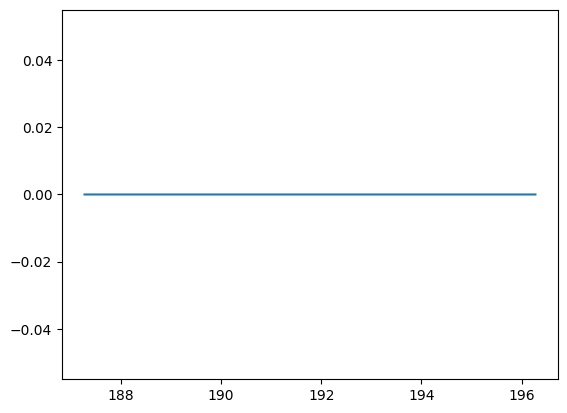

In [ ]:
plt.plot(ws.current_profile[0], ws.current_profile[1])

In [ ]:
# osa.query('*IDN?')

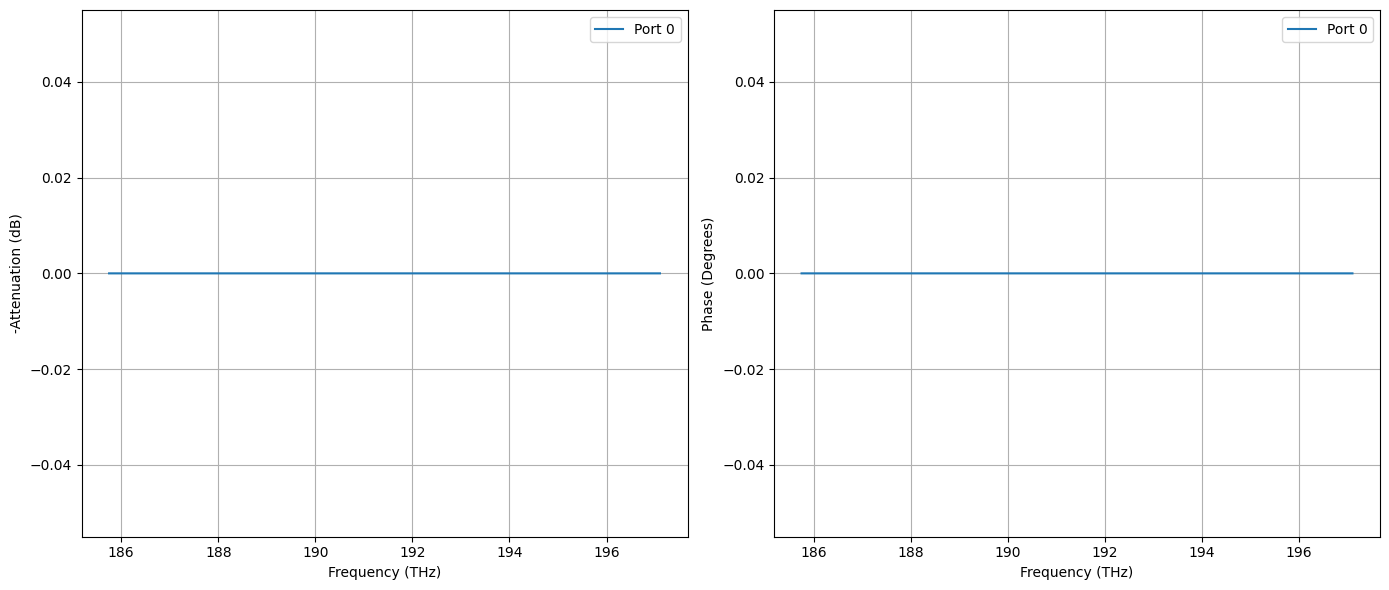

In [ ]:
ws.plot_current_profile()

In [ ]:
kk = ws.separate_by_port(*ws.current_profile)
kk

{0: (array([185.75 , 185.751, 185.752, ..., 197.098, 197.099, 197.1  ]),
  array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.]))}

In [ ]:
uu = ws.set_bandpass(center=1570, span=0.1, unit='nm')

Upload succeeded: {'msg': 'OK', 'rc': 0, 'sno': 'WS202677', 'time_http_transact_us': 29088}


In [ ]:
uu

(array([185.75      , 185.75100009, 185.75200018, ..., 197.09799982,
        197.09899991, 197.1       ]),
 array([<property object at 0x00000202FAFDB4F0>,
        <property object at 0x00000202FAFDB4F0>, ...,
        <property object at 0x00000202FAFDB4F0>], dtype=object),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([1, 1, 1, ..., 1, 1, 1]))

In [ ]:
ws.separate_by_port(*ws.current_profile)

{0: (array([196.275]), array([0.]), array([0.])),
 1: (array([187.275, 187.276, 187.277, ..., 196.272, 196.273, 196.274]),
  array([50., 50., 50., ..., 50., 50., 50.]),
  array([0., 0., 0., ..., 0., 0., 0.]))}

In [ ]:
kk

(array([187.275, 187.276, 187.277, ..., 196.272, 196.273, 196.274]),
 array([50., 50., 50., ..., 50., 50., 50.]),
 array([0., 0., 0., ..., 0., 0., 0.]))

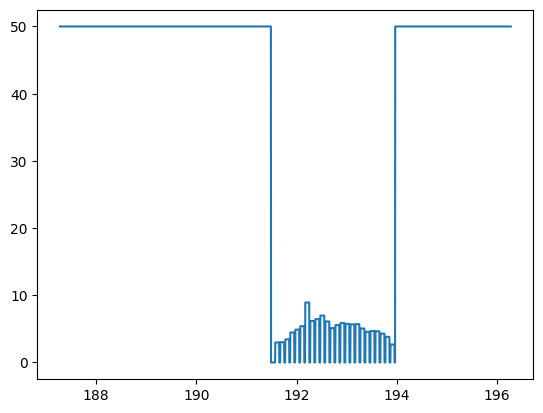

In [ ]:
plt.plot(kk[0], kk[1])